In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data=pd.read_csv('/content/train.csv')

In [915]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:

data.set_index('PassengerId',inplace=True)

In [917]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [918]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


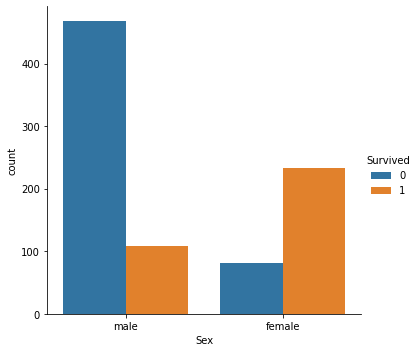

In [919]:
sns.catplot(x="Sex", hue="Survived", kind="count", data=data)

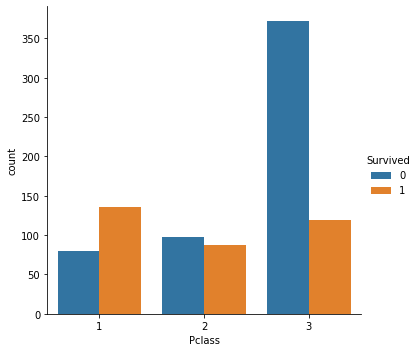

In [920]:
sns.catplot(x="Pclass", hue="Survived", kind="count", data=data)

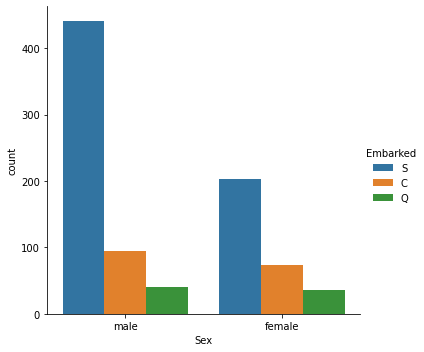

In [921]:
sns.catplot(x="Sex", hue="Embarked", kind="count", data=data);

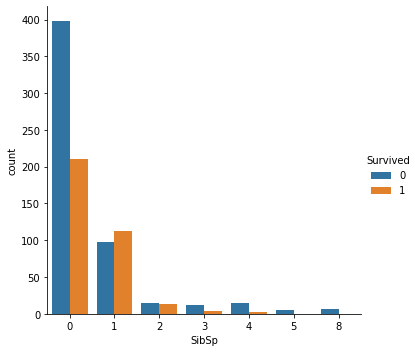

In [922]:
sns.catplot(x="SibSp", hue="Survived", kind="count", data=data);

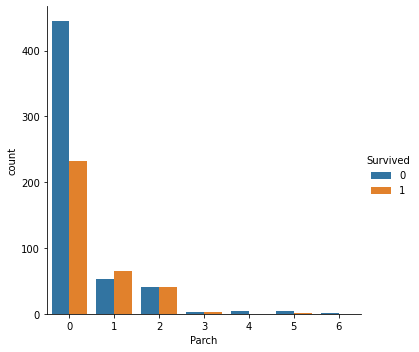

In [923]:
sns.catplot(x="Parch", hue="Survived", kind="count", data=data);

In [924]:
data.shape

(891, 11)

In [925]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [926]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [927]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [0]:
women = data.loc[data.Sex == 'female']["Survived"]
sf = sum(women)/len(women)

In [929]:
sf

0.7420382165605095

In [0]:
#Therefore it is evident that most of the survived passengers were females.

In [0]:
first = data.loc[data.Pclass == 1]["Survived"]
first_class = sum(first)/len(first)

In [932]:
first_class

0.6296296296296297

In [933]:
second = data.loc[data.Pclass == 2]["Survived"]
second_class = sum(second)/len(second)
second_class

0.47282608695652173

In [934]:
df_test=data[['Pclass','Survived']]
df_grp=df_test.groupby(['Pclass'],as_index=False).mean()
df_grp

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [0]:
#From the above dataframe we can imply that more than half of the people who survived were from first class

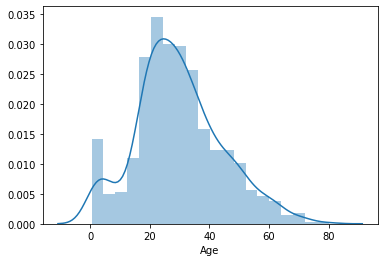

In [936]:
sns.distplot(data['Age'],kde=True)

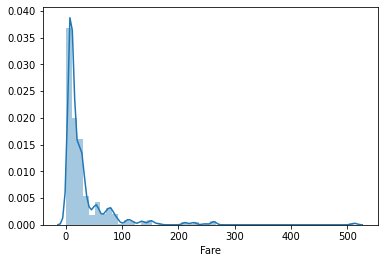

In [937]:
sns.distplot(data['Fare'],kde=True)

In [938]:
sum(data['Age'].between(20, 40))

400

In [939]:
data['Age'].max()

80.0

In [940]:

data['Age'].min()

0.42

In [0]:
age= data.loc[data.Age.between(20,40)]["Survived"]
age_1 = sum(age)/len(age)

In [942]:
age_1

0.39

In [0]:
df={'Age_Range':['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'],'Percentage_Survived':[sum(data.loc[data.Age.between(0,10)]["Survived"])/len(data.loc[data.Age.between(0,10)]["Survived"]),
                    sum(data.loc[data.Age.between(10,20)]["Survived"])/len(data.loc[data.Age.between(10,20)]["Survived"]),
                    sum(data.loc[data.Age.between(20,30)]["Survived"])/len(data.loc[data.Age.between(20,30)]["Survived"]),
                    sum(data.loc[data.Age.between(30,40)]["Survived"])/len(data.loc[data.Age.between(30,40)]["Survived"]),
                    sum(data.loc[data.Age.between(40,50)]["Survived"])/len(data.loc[data.Age.between(40,50)]["Survived"]),
                    sum(data.loc[data.Age.between(50,60)]["Survived"])/len(data.loc[data.Age.between(50,60)]["Survived"]),
                    sum(data.loc[data.Age.between(60,70)]["Survived"])/len(data.loc[data.Age.between(60,70)]["Survived"]),
                    sum(data.loc[data.Age.between(70,80)]["Survived"])/len(data.loc[data.Age.between(70,80)]["Survived"])]}


In [0]:
df_1 = pd.DataFrame(df) 

In [0]:
df_1['Percentage_Survived']=df_1['Percentage_Survived']*100

In [946]:
df_1

,Age_Range,Percentage_Survived
0,0-10,59.375000
1,10-20,37.606838
2,20-30,35.510204
3,30-40,43.888889
4,40-50,39.393939
5,50-60,42.307692
6,60-70,28.571429
7,70-80,14.285714


In [947]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [948]:
data['Fare'].dtypes

dtype('float64')

In [949]:
data.corr()['Fare']

Survived    0.257307
Pclass     -0.549500
Age         0.096067
SibSp       0.159651
Parch       0.216225
Fare        1.000000
Name: Fare, dtype: float64

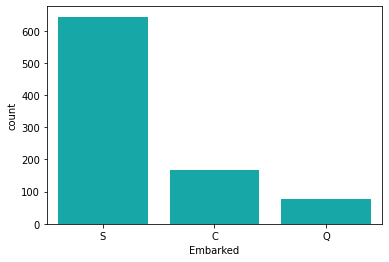

In [950]:
sns.countplot(x=data["Embarked"], data=data, color="c");

In [0]:
 em= data.loc[data.Embarked=='S']["Survived"]
em_1 = sum(em)/len(em)

In [952]:
em_1

0.33695652173913043

In [953]:
em= data.loc[data.Embarked=='C']["Survived"]
em_1 = sum(em)/len(em)
em_1

0.5535714285714286

In [954]:
em= data.loc[data.Embarked=='Q']["Survived"]
em_1 = sum(em)/len(em)
em_1

0.38961038961038963

In [0]:
#Almost 56% of the people who survived embarked from Cherbourg

In [0]:
#Also there are only cabins for first class passengers

In [0]:
data['Family_Members']=data['SibSp']+data['Parch']+1

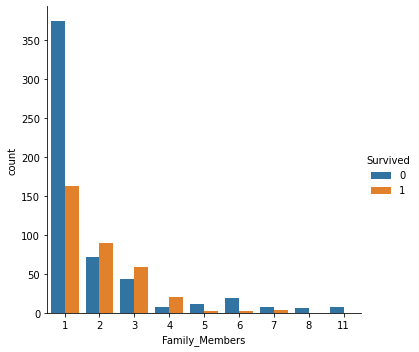

In [958]:
sns.catplot(x="Family_Members", hue="Survived", kind="count", data=data)

In [959]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Members
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [960]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

In [961]:
print(data[data['Embarked'].isnull()][null_columns])

              Age Cabin Embarked
PassengerId                     
62           38.0   B28      NaN
830          62.0   B28      NaN


In [962]:
data.loc[data['Cabin'] == 'B28']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Members
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


In [0]:
data['Embarked'] = data['Embarked'].fillna('S')

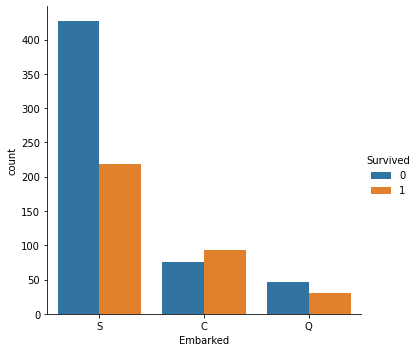

In [964]:
sns.catplot(x="Embarked", hue="Survived", kind="count", data=data)

In [0]:
data['Cabin']=data['Cabin'].fillna('N')

In [966]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Members
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,1


In [0]:
data['Cabin']=data['Cabin'].apply(lambda x: x[0:1])

In [0]:
data=data.rename(columns={'Cabin': 'Deck'})

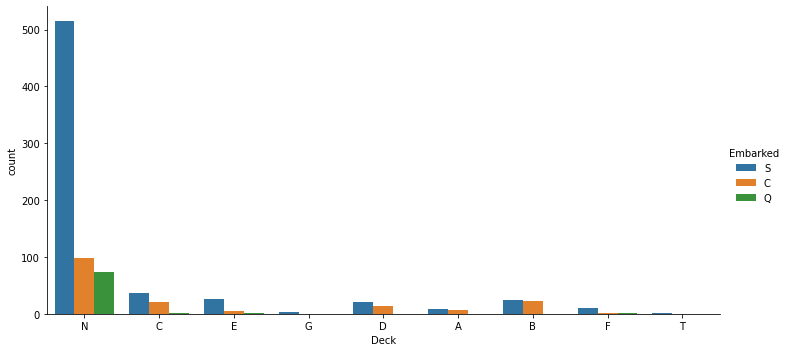

In [969]:
sns.catplot(x="Deck", hue="Embarked", kind="count", data=data,height=5,aspect=2)

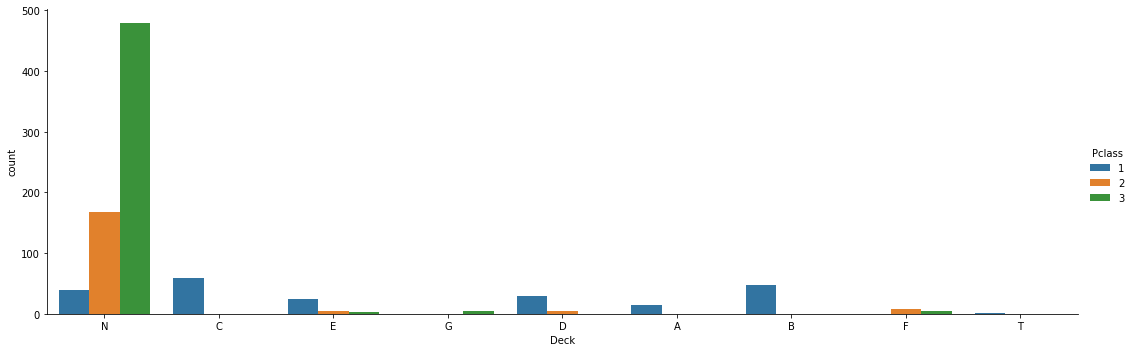

In [970]:
sns.catplot(x="Deck", hue="Pclass", kind="count", data=data,height=5,aspect=3)

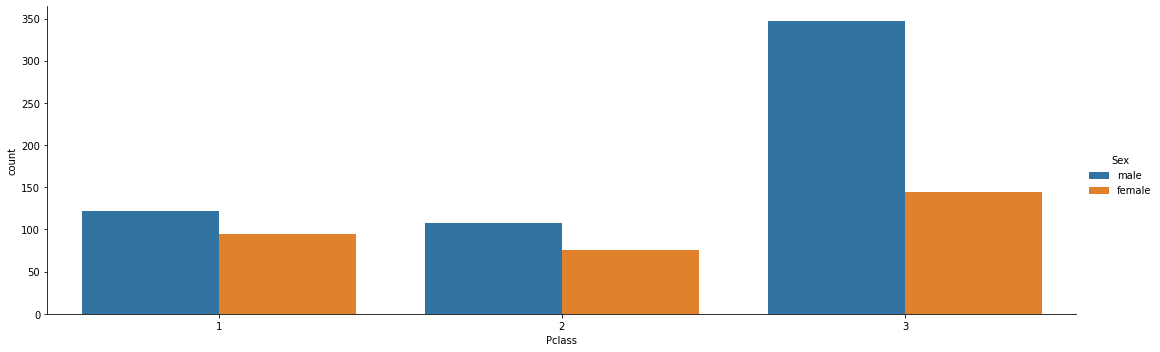

In [971]:
sns.catplot(x="Pclass", hue="Sex", kind="count", data=data,height=5,aspect=3)

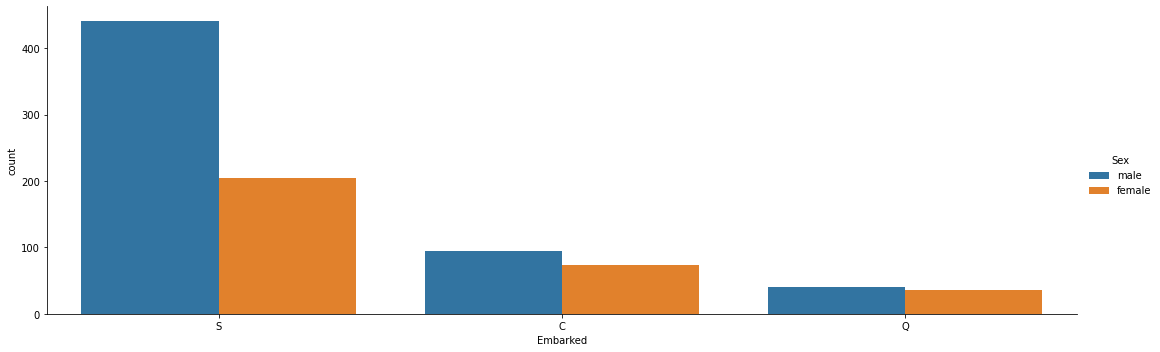

In [972]:
sns.catplot(x="Embarked", hue="Sex", kind="count", data=data,height=5,aspect=3)

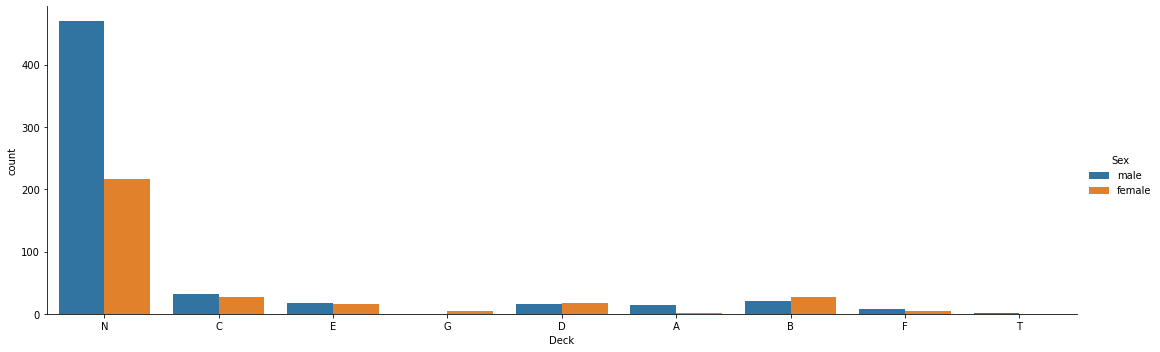

In [973]:
sns.catplot(x="Deck", hue="Sex", kind="count", data=data,height=5,aspect=3)

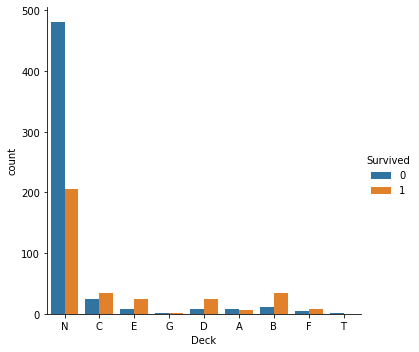

In [974]:
sns.catplot(x="Deck", hue="Survived", kind="count", data=data)

In [975]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Members
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
Family_Members,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


In [976]:
data['Age'].dtype

dtype('float64')

In [977]:
type(data.iloc[0]['Age'])

numpy.float64

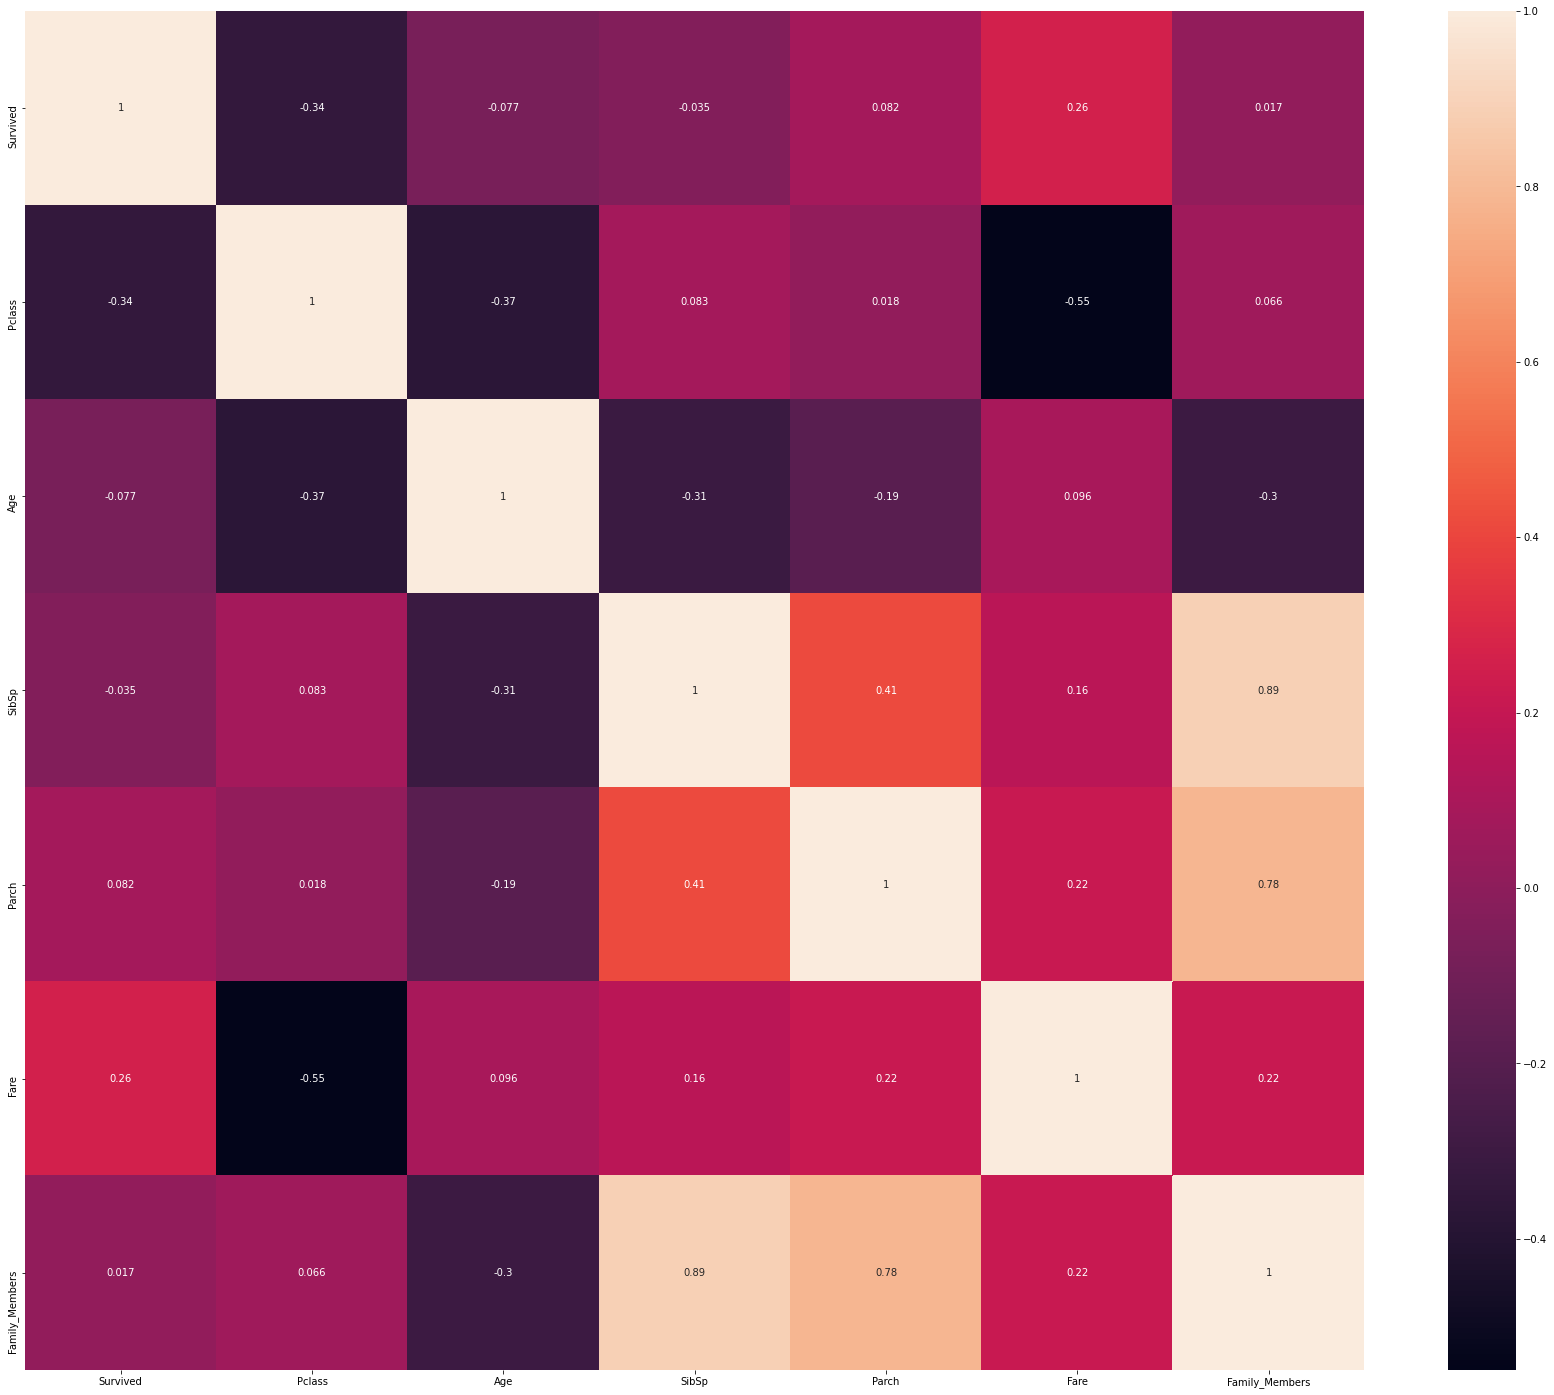

In [978]:
corr= data.corr()
plt.figure (figsize=(30,25))
sns.heatmap(corr, annot = True)

In [979]:
data['Age'].isnull().sum()

177

In [980]:
data.isnull().sum()

Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Deck                0
Embarked            0
Family_Members      0
dtype: int64

In [0]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

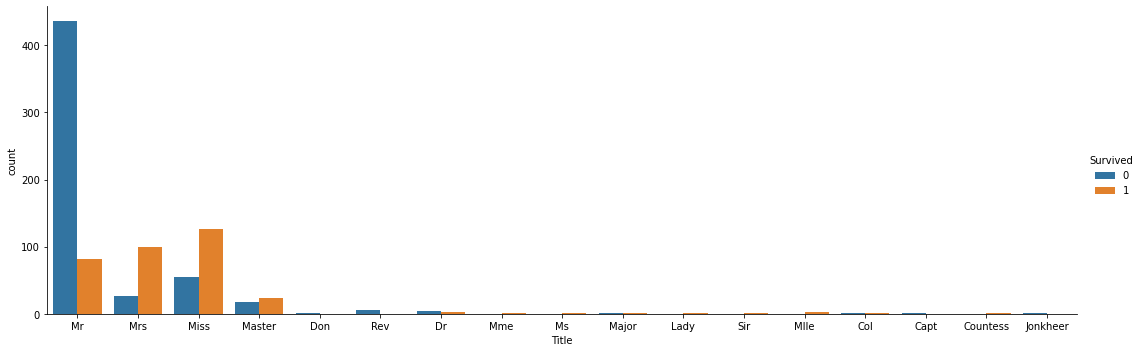

In [982]:
sns.catplot(x="Title", hue="Survived", kind="count", data=data,height=5,aspect=3)

In [983]:
data.corr()['Fare']

Survived          0.257307
Pclass           -0.549500
Age               0.096067
SibSp             0.159651
Parch             0.216225
Fare              1.000000
Family_Members    0.217138
Name: Fare, dtype: float64

In [0]:
features = ['Embarked', 'Deck']

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoded_features = []
for feature in features:
  data[feature]= LabelEncoder().fit_transform(data[feature])
  ed= OneHotEncoder().fit_transform(data[feature].values.reshape(-1, 1)).toarray()
  n = data[feature].nunique()
  cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
  df = pd.DataFrame(ed, columns=cols)
  df.index = data.index
  encoded_features.append(df)

data= pd.concat([data, *encoded_features[:6]], axis=1)


In [986]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Family_Members,Title,Embarked_1,Embarked_2,Embarked_3,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,Deck_9
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,7,2,2,Mr,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,0,2,Mrs,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,7,2,1,Miss,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,2,2,Mrs,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,7,2,1,Mr,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [987]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
data['Sex']= label_encoder.fit_transform(data['Sex']) 
data['Sex'].unique()

array([1, 0])

In [988]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Family_Members,Title,Embarked_1,Embarked_2,Embarked_3,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,Deck_9
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,2,2,Mr,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,2,Mrs,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,2,1,Miss,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2,2,Mrs,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,2,1,Mr,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [0]:
data=data.drop(['Deck','Embarked'], axis = 1)

In [990]:
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Countess      1
Lady          1
Ms            1
Don           1
Mme           1
Sir           1
Jonkheer      1
Capt          1
Name: Title, dtype: int64

In [0]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }
data['Title'] = data['Title'].map(title_mapping)

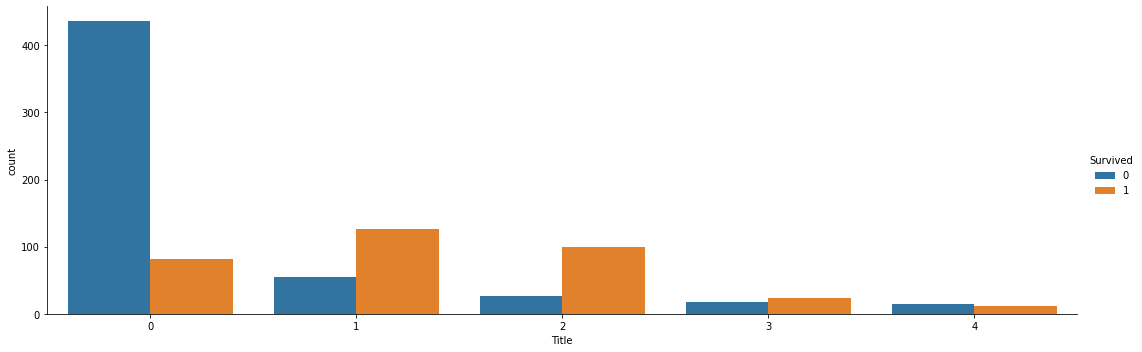

In [992]:
sns.catplot(x="Title", hue="Survived", kind="count", data=data,height=5,aspect=3)

In [993]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family_Members,Title,Embarked_1,Embarked_2,Embarked_3,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,Deck_9
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.016639,0.414088,0.168240,0.003650,-0.149683,0.022287,0.175095,0.114652,0.150716,0.145321,0.057935,0.016040,-0.316912,-0.026456
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.065997,-0.184841,-0.243292,0.221009,0.074053,-0.204934,-0.369572,-0.417048,-0.278690,-0.230091,0.011063,0.055561,0.725541,-0.052496
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.200988,-0.508099,-0.082853,-0.074115,0.119224,0.078271,-0.109689,-0.058649,-0.079248,-0.047003,-0.008202,-0.091031,0.140391,0.024728
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.301914,-0.106788,0.036261,-0.022405,-0.023233,0.136309,0.093914,0.122041,0.136975,0.121440,-0.083970,-0.077296,-0.249732,0.039474
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.890712,0.258403,-0.059528,-0.026354,0.068734,-0.046266,-0.034538,0.029251,-0.017575,-0.036865,0.001706,-0.001402,0.040460,-0.015907
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.783111,0.303608,-0.011069,-0.081228,0.060814,-0.040325,0.056498,0.030736,-0.019125,-0.016554,0.023694,0.072388,-0.036987,-0.015878
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.217138,0.137318,0.269335,-0.117216,-0.162184,0.019549,0.386297,0.364318,0.098878,0.053717,-0.033093,-0.025180,-0.482075,0.002224
Family_Members,0.016639,0.065997,-0.200988,-0.301914,0.890712,0.783111,0.217138,1.000000,0.328287,-0.046215,-0.058592,0.077359,-0.051767,0.004620,0.035347,-0.021566,-0.033466,0.013003,0.035206,0.009175,-0.018804
Title,0.414088,-0.184841,-0.508099,-0.106788,0.258403,0.303608,0.137318,0.328287,1.000000,0.072465,0.007457,-0.068175,0.032264,0.125035,0.048489,0.031400,0.007436,0.056708,0.048490,-0.144521,-0.023614
Embarked_1,0.168240,-0.243292,-0.082853,0.036261,-0.059528,-0.011069,0.269335,-0.046215,0.072465,1.000000,-0.148258,-0.782742,0.093040,0.168642,0.113952,0.102977,-0.015939,-0.034726,-0.032371,-0.208528,-0.016158


In [0]:
#ag = data.groupby(['SibSp', 'Pclass','Family_Members']).median()['Age']
data['Age'] = data.groupby(['Sex', 'Pclass','Family_Members'])['Age'].apply(lambda x: x.fillna(x.median()))

In [996]:
data.isnull().sum()

Survived          0
Pclass            0
Name              0
Sex               0
Age               7
SibSp             0
Parch             0
Ticket            0
Fare              0
Family_Members    0
Title             0
Embarked_1        0
Embarked_2        0
Embarked_3        0
Deck_1            0
Deck_2            0
Deck_3            0
Deck_4            0
Deck_5            0
Deck_6            0
Deck_7            0
Deck_8            0
Deck_9            0
dtype: int64

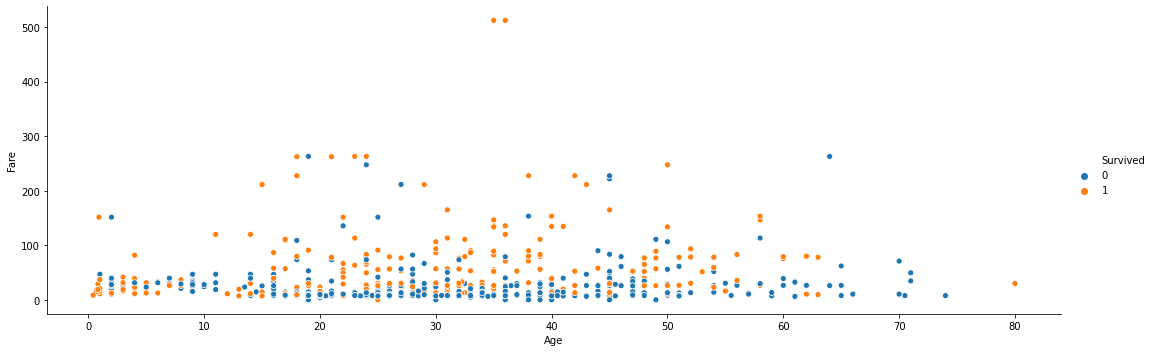

In [997]:
sns.relplot(x="Age", y="Fare", hue="Survived", data=data,height=5,aspect=3)

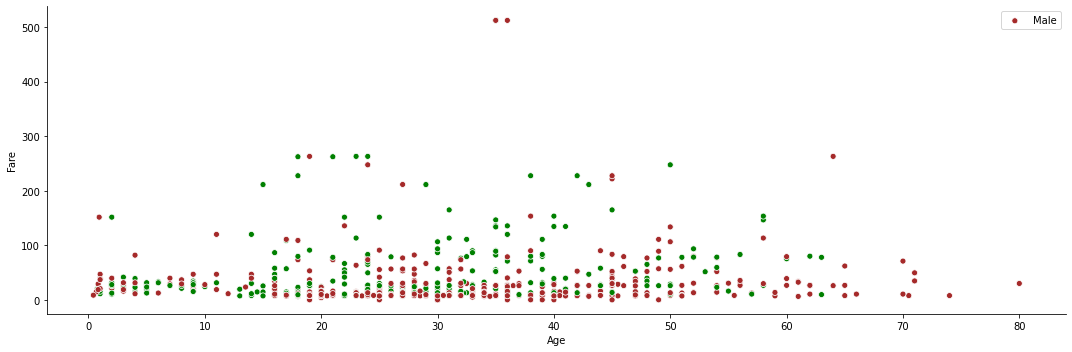

In [998]:
t=sns.relplot(x="Age", y="Fare", hue="Sex", data=data,height=5,aspect=3,legend=False,palette=['green','brown'])
t.ax.legend(['Male','Female'])

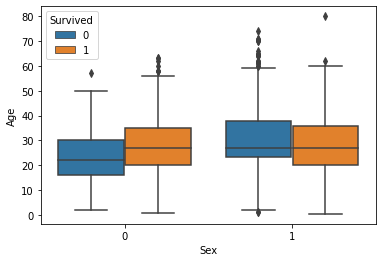

In [999]:
sns.boxplot(x='Sex', y='Age', data=data, hue="Survived")

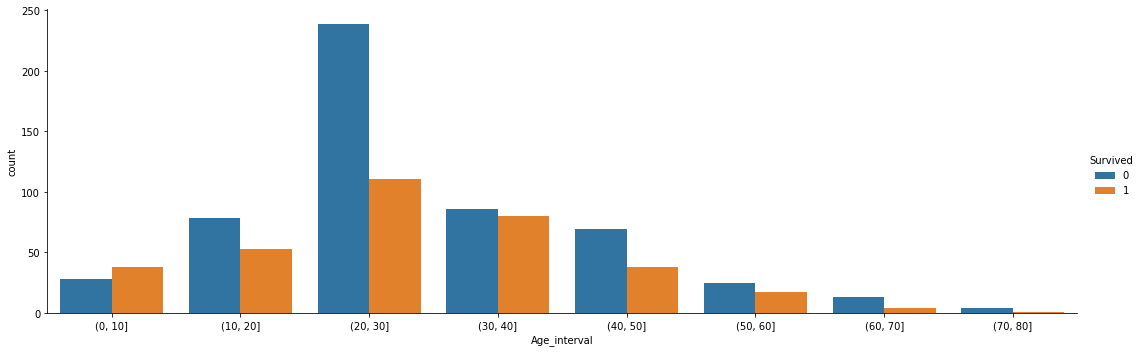

In [1000]:
data['Age_interval'] =pd.cut(data['Age'],bins=[0,10,20,30,40,50,60,70,80])
#plt.figure(figsize=(30,18))
sns.catplot(x='Age_interval', hue="Survived", kind="count", data=data,height=5,aspect=3)

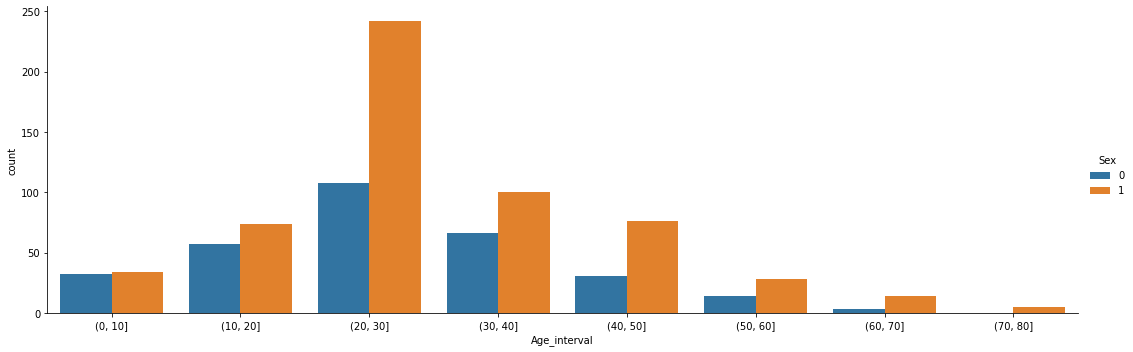

In [1001]:
sns.catplot(x='Age_interval', hue="Sex", kind="count", data=data,height=5,aspect=3)

In [0]:
data=data.drop(['Name'], axis = 1)

In [1003]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Family_Members,Title,Embarked_1,Embarked_2,Embarked_3,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,Deck_9,Age_interval
PassengerId,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,22.0,1,0,A/5 21171,7.2500,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(20, 30]"
2,1,1,0,38.0,1,0,PC 17599,71.2833,2,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"(30, 40]"
3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(20, 30]"
4,1,1,0,35.0,1,0,113803,53.1000,2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"(30, 40]"
5,0,3,1,35.0,0,0,373450,8.0500,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(30, 40]"


In [0]:
data['Ticket_freq'] = data.groupby('Ticket')['Ticket'].transform('count')

In [1005]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Family_Members,Title,Embarked_1,Embarked_2,Embarked_3,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,Deck_9,Age_interval,Ticket_freq
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,22.0,1,0,A/5 21171,7.2500,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(20, 30]",1
2,1,1,0,38.0,1,0,PC 17599,71.2833,2,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"(30, 40]",1
3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(20, 30]",1
4,1,1,0,35.0,1,0,113803,53.1000,2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"(30, 40]",2
5,0,3,1,35.0,0,0,373450,8.0500,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(30, 40]",1


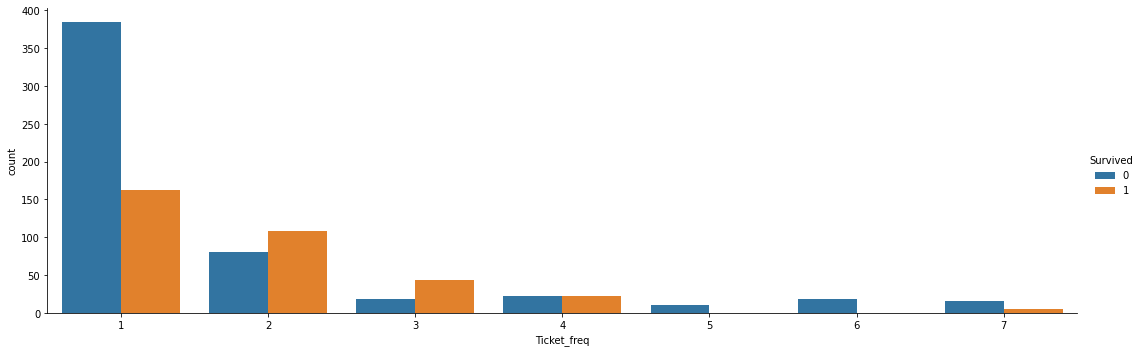

In [1006]:
sns.catplot(x="Ticket_freq", hue="Survived", kind="count", data=data,height=5,aspect=3)

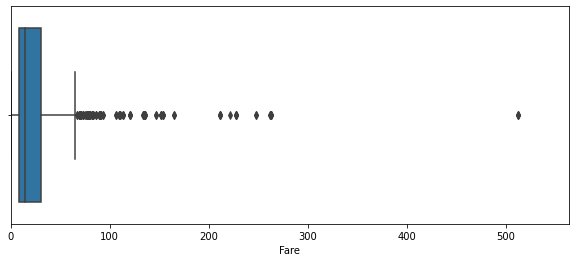

In [1007]:

plt.figure(figsize=(10,4))
plt.xlim(data['Fare'].min(), data['Fare'].max()*1.1)
sns.boxplot(x=data['Fare'])

In [1008]:
data.corr()['Fare']>0.1

Survived           True
Pclass            False
Sex               False
Age                True
SibSp              True
Parch              True
Fare               True
Family_Members     True
Title              True
Embarked_1         True
Embarked_2        False
Embarked_3        False
Deck_1            False
Deck_2             True
Deck_3             True
Deck_4            False
Deck_5            False
Deck_6            False
Deck_7            False
Deck_8            False
Deck_9            False
Ticket_freq        True
Name: Fare, dtype: bool

In [1009]:
data.corr()['Fare']<=0.1

Survived          False
Pclass             True
Sex                True
Age               False
SibSp             False
Parch             False
Fare              False
Family_Members    False
Title             False
Embarked_1        False
Embarked_2         True
Embarked_3         True
Deck_1             True
Deck_2            False
Deck_3            False
Deck_4             True
Deck_5             True
Deck_6             True
Deck_7             True
Deck_8             True
Deck_9             True
Ticket_freq       False
Name: Fare, dtype: bool

In [0]:
data['Fare_interval']=pd.qcut(data['Fare'], 10)

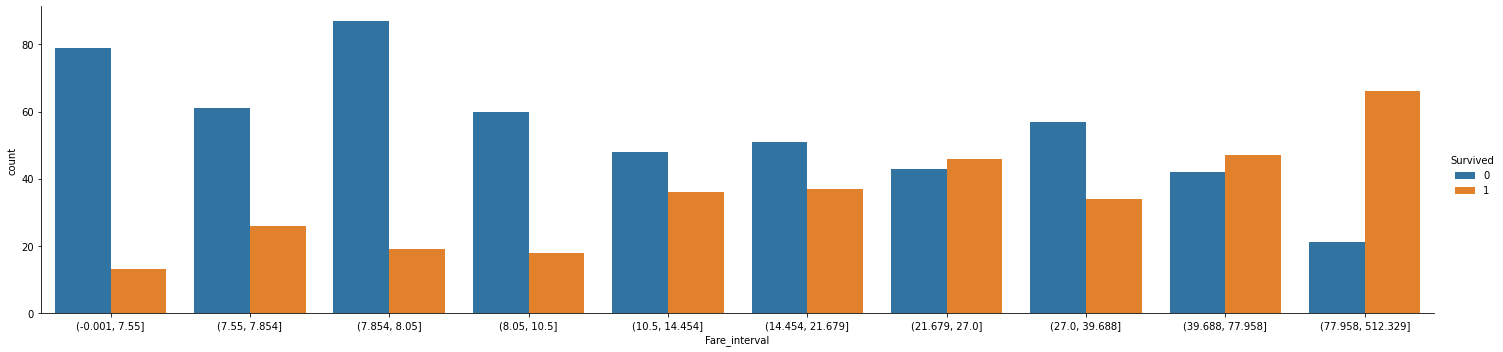

In [1011]:
sns.catplot(x='Fare_interval', hue="Survived", kind="count", data=data,height=5,aspect=4)

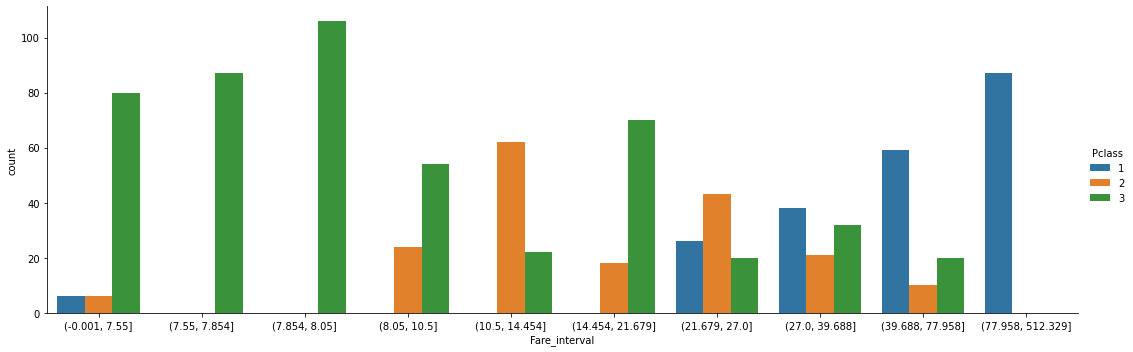

In [1012]:
sns.catplot(x="Fare_interval", hue="Pclass", kind="count", data=data,height=5,aspect=3)

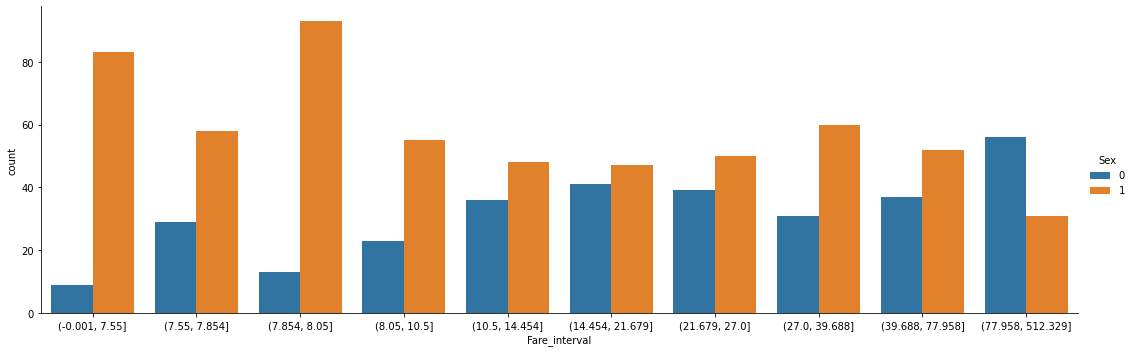

In [1013]:
sns.catplot(x="Fare_interval", hue="Sex", kind="count", data=data,height=5,aspect=3)

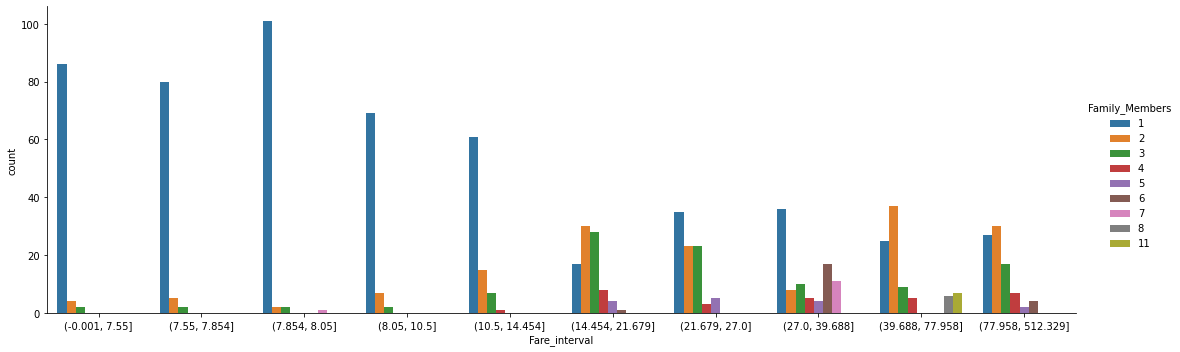

In [1014]:
sns.catplot(x="Fare_interval", hue="Family_Members", kind="count", data=data,height=5,aspect=3)

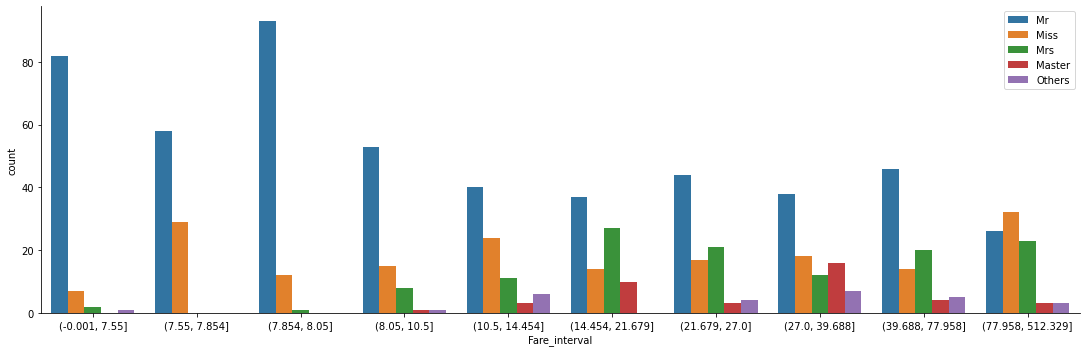

In [1015]:
lt=sns.catplot(x="Fare_interval", hue="Title", kind="count", data=data,height=5,aspect=3,legend=False)
lt.ax.legend(['Mr', 'Miss','Mrs','Master','Others'])

In [1016]:
data.corr()['Family_Members']

Survived          0.016639
Pclass            0.065997
Sex              -0.200988
Age              -0.297948
SibSp             0.890712
Parch             0.783111
Fare              0.217138
Family_Members    1.000000
Title             0.328287
Embarked_1       -0.046215
Embarked_2       -0.058592
Embarked_3        0.077359
Deck_1           -0.051767
Deck_2            0.004620
Deck_3            0.035347
Deck_4           -0.021566
Deck_5           -0.033466
Deck_6            0.013003
Deck_7            0.035206
Deck_8            0.009175
Deck_9           -0.018804
Ticket_freq       0.748487
Name: Family_Members, dtype: float64

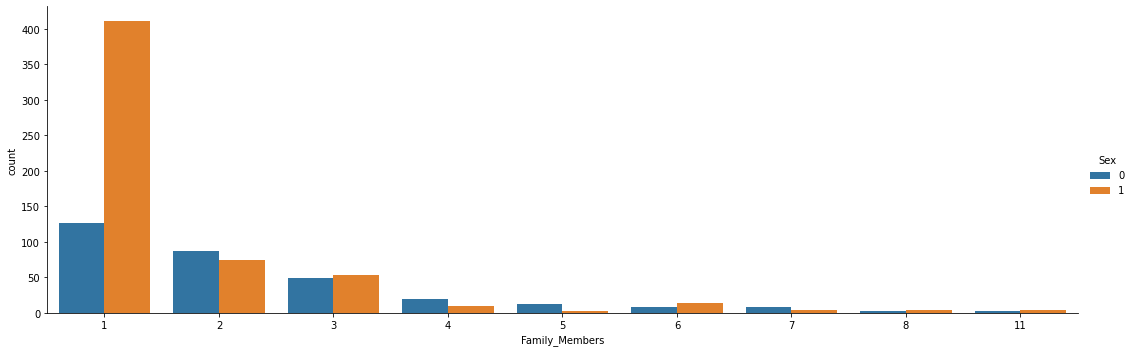

In [1017]:
sns.catplot(x="Family_Members", hue="Sex", kind="count", data=data,height=5,aspect=3)

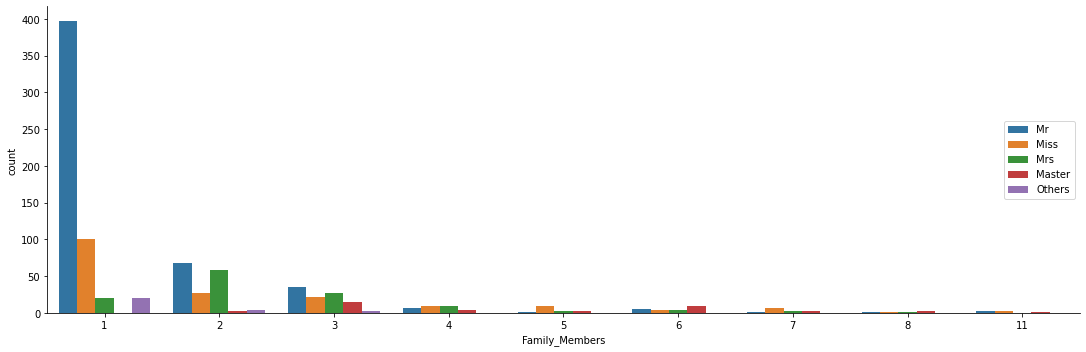

In [1018]:
lines=sns.catplot(x="Family_Members", hue="Title", kind="count", data=data,height=5,aspect=3,legend=False)
lines.ax.legend(['Mr', 'Miss','Mrs','Master','Others'],loc=5)

In [0]:
data=data.drop(['Ticket'],axis=1)

In [1020]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family_Members,Title,Embarked_1,Embarked_2,Embarked_3,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,Deck_9,Age_interval,Ticket_freq,Fare_interval
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(20, 30]",1,"(-0.001, 7.55]"
2,1,1,0,38.0,1,0,71.2833,2,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"(30, 40]",1,"(39.688, 77.958]"
3,1,3,0,26.0,0,0,7.9250,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(20, 30]",1,"(7.854, 8.05]"
4,1,1,0,35.0,1,0,53.1000,2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"(30, 40]",2,"(39.688, 77.958]"
5,0,3,1,35.0,0,0,8.0500,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(30, 40]",1,"(7.854, 8.05]"


In [1021]:
data.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age               7
SibSp             0
Parch             0
Fare              0
Family_Members    0
Title             0
Embarked_1        0
Embarked_2        0
Embarked_3        0
Deck_1            0
Deck_2            0
Deck_3            0
Deck_4            0
Deck_5            0
Deck_6            0
Deck_7            0
Deck_8            0
Deck_9            0
Age_interval      7
Ticket_freq       0
Fare_interval     0
dtype: int64

In [0]:
#data.groupby(['SibSp', 'Pclass','Family_Members']).median()['Age']
data['Age'] = data.groupby(['Sex', 'Pclass','Family_Members'])['Age'].apply(lambda x: x.fillna(x.median()))

In [1027]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Survived        891 non-null    int64   
 1   Pclass          891 non-null    int64   
 2   Sex             891 non-null    int64   
 3   Age             884 non-null    float64 
 4   SibSp           891 non-null    int64   
 5   Parch           891 non-null    int64   
 6   Fare            891 non-null    float64 
 7   Family_Members  891 non-null    int64   
 8   Title           891 non-null    int64   
 9   Embarked_1      891 non-null    float64 
 10  Embarked_2      891 non-null    float64 
 11  Embarked_3      891 non-null    float64 
 12  Deck_1          891 non-null    float64 
 13  Deck_2          891 non-null    float64 
 14  Deck_3          891 non-null    float64 
 15  Deck_4          891 non-null    float64 
 16  Deck_5          891 non-null    float64 
 17  Deck_6          

In [0]:
data['Survived'] = data['Survived'].astype(float)

In [0]:
data=data.drop(['Age_interval','Fare_interval'],axis=1)

In [0]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(missing_values=np.nan, strategy='median')
data= pd.DataFrame(imp.fit_transform(data))

In [1050]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
dtype: int64

In [1046]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [0]:
X=data.drop([0],axis=1)
y=data[0]

In [1053]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(X, y)

5

In [1054]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [1055]:
X.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
dtype: int64

In [1057]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(12,'Score'))

    Specs       Score
1       2  372.405724
7       8  183.982762
0       1  115.031272
18     19   99.253142
5       6   63.030764
12     13   28.117228
8       9   25.895987
14     15   20.663186
10     11   20.374460
15     16   19.179221
13     14   11.841661
4       5    5.963464


In [0]:
X=X.to_numpy()
y=y.to_numpy()

In [0]:
for train_index, valid_index in sss.split(X, y):
  #print("TRAIN:", train_index, "TEST:", valid_index)
  X_train, X_valid = X[train_index], X[valid_index]
  y_train, y_valid = y[train_index], y[valid_index]

In [0]:
rf=RandomForestClassifier(random_state=1)

In [1063]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF =RandomizedSearchCV(rf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = 2)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:   17.6s finished


In [1064]:
bestF.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

In [1065]:
bestF.best_score_

0.8495072253461515

In [0]:
rf1=RandomForestClassifier(max_depth=25,min_samples_leaf=1,min_samples_split=10,n_estimators=300).fit(X_train,y_train)

In [0]:
predictions =rf1.predict(X_valid) 
from sklearn.metrics import mean_squared_error

In [1073]:
mean_squared_error(y_valid,predictions)

0.1860986547085202

In [1077]:
from sklearn.metrics import f1_score
f1_score(y_valid,predictions)

0.7430340557275541

In [1078]:
from sklearn.metrics import classification_report

print(classification_report(y_valid,predictions))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       275
         1.0       0.79      0.70      0.74       171

    accuracy                           0.81       446
   macro avg       0.81      0.79      0.80       446
weighted avg       0.81      0.81      0.81       446

